In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from heatmap import heatmap, corrplot

In [283]:
#pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [374]:
#pip install heatmapz

Note: you may need to restart the kernel to use updated packages.


In [2]:
X=pd.read_csv('./SDGData.csv',)

In [3]:
X.drop(['Unnamed: 34','Country Name','Indicator Name'],axis=1,inplace=True)

KeyError: "['Unnamed: 34' 'Country Name' 'Indicator Name'] not found in axis"

In [4]:
score=pd.read_excel('./SDI+and+Components+(1990-2019).xlsx')

In [5]:
score

,iso,country,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,AFG,Afghanistan,0.325,0.331,0.340,0.335,0.330,0.356,0.360,0.366,...,0.508,0.514,0.527,0.534,0.538,0.538,0.541,0.545,0.549,0.551
1,ALB,Albania,0.699,0.680,0.662,0.665,0.672,0.686,0.695,0.695,...,0.796,0.811,0.822,0.826,0.826,0.823,0.821,0.821,0.823,0.826
2,DZA,Algeria,0.616,0.621,0.627,0.631,0.635,0.640,0.649,0.658,...,0.776,0.785,0.784,0.785,0.791,0.794,0.798,0.800,0.801,0.803
3,AGO,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.558,0.574,0.586,0.598,0.608,0.616,0.622,0.627,0.627,0.626
4,ATG,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.659,0.630,0.649,0.635,0.621,0.620,0.617,0.616,0.619,0.622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,VEN,Venezuela,0.684,0.694,0.696,0.700,0.702,0.703,0.705,0.705,...,0.766,0.791,0.782,0.785,0.783,0.775,0.762,0.743,0.733,0.712
161,VNM,Viet Nam,0.521,0.531,0.543,0.554,0.566,0.578,0.590,0.589,...,0.704,0.714,0.719,0.720,0.717,0.717,0.719,0.720,0.724,0.729
162,YEM,Yemen,0.431,0.432,0.434,0.437,0.439,0.446,0.454,0.459,...,0.545,0.545,0.543,0.549,0.541,0.521,0.511,0.503,0.504,0.506
163,ZMB,Zambia,0.453,0.449,0.448,0.451,0.446,0.447,0.447,0.448,...,0.568,0.575,0.592,0.600,0.603,0.613,0.616,0.622,0.626,0.629


In [6]:
score.drop(['country'],axis=1,inplace=True)

In [7]:
score=score.melt(id_vars='iso')

In [8]:
score.columns=['iso','year','score']

In [9]:
score

,iso,year,score
0,AFG,1990,0.325
1,ALB,1990,0.699
2,DZA,1990,0.616
3,AGO,1990,NaN
4,ATG,1990,NaN
...,...,...,...
4945,VEN,2019,0.712
4946,VNM,2019,0.729
4947,YEM,2019,0.506
4948,ZMB,2019,0.629


In [10]:
X

,Country Code,Indicator Code,2018
0,ARB,EG.CFT.ACCS.ZS,NaN
1,ARB,EG.ELC.ACCS.ZS,89.286856
2,ARB,EG.ELC.ACCS.RU.ZS,79.248100
3,ARB,EG.ELC.ACCS.UR.ZS,97.063959
4,ARB,FX.OWN.TOTL.ZS,NaN
...,...,...,...
106247,ZWE,ER.GDP.FWTL.M3.KD,NaN
106248,ZWE,SG.LAW.INDX,86.875000
106249,ZWE,SG.DMK.SRCR.FN.ZS,NaN
106250,ZWE,SP.M15.2024.FE.ZS,NaN


In [11]:
X.melt(id_vars='Country Code',value_vars=['1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'],)

KeyError: "The following 'value_vars' are not present in the DataFrame: ['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2019']"

In [12]:
X.pivot_table(index=['Country Code'])

,2018
Country Code,
ABW,2.183373e+06
AFG,1.518479e+10
AGO,1.834686e+11
ALB,2.170474e+10
AND,1.770735e+08
...,...
XKX,1.470700e+09
YEM,1.015340e+11
ZAF,8.182559e+10


In [13]:
X.melt(id_vars=['Country Code','Indicator Code'])

,Country Code,Indicator Code,variable,value
0,ARB,EG.CFT.ACCS.ZS,2018,NaN
1,ARB,EG.ELC.ACCS.ZS,2018,89.286856
2,ARB,EG.ELC.ACCS.RU.ZS,2018,79.248100
3,ARB,EG.ELC.ACCS.UR.ZS,2018,97.063959
4,ARB,FX.OWN.TOTL.ZS,2018,NaN
...,...,...,...,...
106247,ZWE,ER.GDP.FWTL.M3.KD,2018,NaN
106248,ZWE,SG.LAW.INDX,2018,86.875000
106249,ZWE,SG.DMK.SRCR.FN.ZS,2018,NaN
106250,ZWE,SP.M15.2024.FE.ZS,2018,NaN


In [14]:
X.melt(id_vars=['Country Code','1990'])

KeyError: "The following 'id_vars' are not present in the DataFrame: ['1990']"

In [15]:
score

,iso,year,score
0,AFG,1990,0.325
1,ALB,1990,0.699
2,DZA,1990,0.616
3,AGO,1990,NaN
4,ATG,1990,NaN
...,...,...,...
4945,VEN,2019,0.712
4946,VNM,2019,0.729
4947,YEM,2019,0.506
4948,ZMB,2019,0.629


In [16]:
data1990=pd.read_excel('./SDGData.xls',sheet_name='1990')

In [17]:
data1991=pd.read_excel('./SDGData.xls',sheet_name='1991')

In [18]:
data1992=pd.read_excel('./SDGData.xls',sheet_name='1992')

In [19]:
data1993=pd.read_excel('./SDGData.xls',sheet_name='1993')

In [20]:
data1994=pd.read_excel('./SDGData.xls',sheet_name='1994')

In [21]:
data1995=pd.read_excel('./SDGData.xls',sheet_name='1995')

In [22]:
data1996=pd.read_excel('./SDGData.xls',sheet_name='1996')

In [23]:
data1997=pd.read_excel('./SDGData.xls',sheet_name='1997')

In [24]:
data1998=pd.read_excel('./SDGData.xls',sheet_name='1998')

In [25]:
data1999=pd.read_excel('./SDGData.xls',sheet_name='1999')

In [26]:
data2000=pd.read_excel('./SDGData.xls',sheet_name='2000')

In [27]:
data2001=pd.read_excel('./SDGData.xls',sheet_name='2001')

In [28]:
data2002=pd.read_excel('./SDGData.xls',sheet_name='2002')

In [29]:
data2003=pd.read_excel('./SDGData.xls',sheet_name='2003')

In [30]:
data2004=pd.read_excel('./SDGData.xls',sheet_name='2004')

In [31]:
data2005=pd.read_excel('./SDGData.xls',sheet_name='2005')

In [32]:
data2006=pd.read_excel('./SDGData.xls',sheet_name='2006')

In [33]:
data2007=pd.read_excel('./SDGData.xls',sheet_name='2007')

In [34]:
data2008=pd.read_excel('./SDGData.xls',sheet_name='2008')

In [35]:
data2009=pd.read_excel('./SDGData.xls',sheet_name='2009')

In [36]:
data2010=pd.read_excel('./SDGData.xls',sheet_name='2010')

In [37]:
data2011=pd.read_excel('./SDGData.xls',sheet_name='2011')

In [38]:
data2012=pd.read_excel('./SDGData.xls',sheet_name='2012')

In [39]:
data2013=pd.read_excel('./SDGData.xls',sheet_name='2013')

In [40]:
data2014=pd.read_excel('./SDGData.xls',sheet_name='2014')

In [41]:
data2015=pd.read_excel('./SDGData.xls',sheet_name='2015')

In [42]:
data2016=pd.read_excel('./SDGData.xls',sheet_name='2016')

In [43]:
data2017=pd.read_excel('./SDGData.xls',sheet_name='2017')

In [44]:
data2018=pd.read_excel('./SDGData.xls',sheet_name='2018')

In [45]:
data2019=pd.read_excel('./SDGData.xls',sheet_name='2019')

In [46]:
data1990['year']=1990
data1991['year']=1991
data1992['year']=1992
data1993['year']=1993
data1994['year']=1994
data1995['year']=1995
data1996['year']=1996
data1997['year']=1997
data1998['year']=1998
data1999['year']=1999
data2000['year']=2000
data2001['year']=2001
data2002['year']=2002
data2003['year']=2003
data2004['year']=2004
data2005['year']=2005
data2006['year']=2006
data2007['year']=2007
data2008['year']=2008
data2009['year']=2009
data2010['year']=2010
data2011['year']=2011
data2012['year']=2012
data2013['year']=2013
data2014['year']=2014
data2015['year']=2015
data2016['year']=2016
data2017['year']=2017
data2018['year']=2018
data2019['year']=2019

In [47]:
data=pd.concat([data1990,data1991,data1992,data1993,data1994,data1995,data1996,data1997,data1998,data1999,data2000,
           data2001,data2002,data2003,data2004,data2005,data2006,data2007,data2008,data2009,data2010,data2011,
           data2012,data2013,data2014,data2015,data2016,data2017,data2018,data2019])

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4920 entries, 0 to 163
Columns: 257 entries, Country Code to year
dtypes: float64(254), int64(1), object(2)
memory usage: 9.7+ MB


In [49]:
score.year=score.year.astype('int')

In [50]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4950 entries, 0 to 4949
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   iso     4950 non-null   object 
 1   year    4950 non-null   int64  
 2   score   4641 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 116.1+ KB


In [51]:
data=pd.merge(data,score,how='inner',left_on=['Country Code','year'],right_on=['iso','year'])

In [52]:
data

,Country Code,AG.LND.FRST.K2,AG.LND.FRST.ZS,AG.YLD.CREL.KG,BN.CAB.XOKA.GD.ZS,BN.KLT.PTXL.CD,BX.KLT.DINV.CD.WD,BX.KLT.DINV.WD.GD.ZS,BX.TRF.PWKR.DT.GD.ZS,DT.DOD.DECT.GN.ZS,...,SH.ALC.PCAP.LI,SH.ALC.PCAP.MA.LI,SH.ANM.ALLW.ZS,SH.DYN.AIDS.ZS,SH.DYN.MORT,SH.DYN.MORT.FE,SH.DYN.MORT.MA,year,iso,score
0,AFG,12084.4,1.850994,1200.6,NaN,NaN,1.000000e+01,NaN,NaN,NaN,...,NaN,NaN,NaN,0.1,177.7,173.1,182.0,1990,AFG,0.325
1,AGO,792627.8,63.578070,320.9,-2.097292,0.000000e+00,-3.348000e+08,-2.981628,NaN,85.689843,...,NaN,NaN,NaN,0.2,222.2,210.4,233.3,1990,AGO,NaN
2,ALB,7888.0,28.788321,2794.4,-5.831741,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,...,NaN,NaN,NaN,0.1,41.0,37.0,44.8,1990,ALB,0.699
3,ARG,352040.0,12.863715,2250.8,3.220321,1.309000e+09,1.836000e+09,1.298882,0.016158,46.228331,...,NaN,NaN,NaN,0.1,28.6,25.6,31.6,1990,ARG,0.771
4,ARM,3350.0,11.766772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.1,48.9,44.0,53.5,1990,ARM,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,LTU,NaN,NaN,NaN,3.325752,-2.655256e+09,1.573982e+09,2.881304,2.386971,NaN,...,NaN,NaN,19.9,0.2,3.7,3.3,4.0,2019,LTU,0.291
2696,LVA,NaN,NaN,NaN,-0.650308,-7.052831e+08,1.059246e+09,3.106028,3.350482,NaN,...,NaN,NaN,21.6,0.5,3.6,3.3,3.9,2019,LVA,0.535
2697,SLV,NaN,NaN,NaN,-2.064323,-3.782219e+07,7.247540e+08,2.682025,20.929710,70.231124,...,NaN,NaN,10.6,0.5,13.3,11.9,14.6,2019,SLV,0.724
2698,SWZ,NaN,NaN,NaN,4.375434,8.525335e+07,1.279709e+08,2.861861,2.654578,15.585213,...,NaN,NaN,30.7,27.0,49.4,44.7,53.8,2019,SWZ,0.627


In [53]:
data.drop('Country Code',axis=1,inplace=True)

In [54]:
data_backup=data.copy()

In [55]:
data=data[~data['score'].isna()]

In [56]:
data

,AG.LND.FRST.K2,AG.LND.FRST.ZS,AG.YLD.CREL.KG,BN.CAB.XOKA.GD.ZS,BN.KLT.PTXL.CD,BX.KLT.DINV.CD.WD,BX.KLT.DINV.WD.GD.ZS,BX.TRF.PWKR.DT.GD.ZS,DT.DOD.DECT.GN.ZS,DT.ODA.ALLD.CD,...,SH.ALC.PCAP.LI,SH.ALC.PCAP.MA.LI,SH.ANM.ALLW.ZS,SH.DYN.AIDS.ZS,SH.DYN.MORT,SH.DYN.MORT.FE,SH.DYN.MORT.MA,year,iso,score
0,12084.4,1.850994,1200.6,NaN,NaN,1.000000e+01,NaN,NaN,NaN,1.227200e+08,...,NaN,NaN,NaN,0.1,177.7,173.1,182.0,1990,AFG,0.325
2,7888.0,28.788321,2794.4,-5.831741,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,1.105000e+07,...,NaN,NaN,NaN,0.1,41.0,37.0,44.8,1990,ALB,0.699
3,352040.0,12.863715,2250.8,3.220321,1.309000e+09,1.836000e+09,1.298882,0.016158,46.228331,1.716300e+08,...,NaN,NaN,NaN,0.1,28.6,25.6,31.6,1990,ARG,0.771
6,1338822.0,17.427359,1716.1,-4.997851,-7.566984e+09,8.457777e+09,2.721458,0.762461,NaN,NaN,...,NaN,NaN,NaN,0.1,9.2,8.1,10.3,1990,AUS,0.336
7,37756.7,45.721361,5577.3,NaN,NaN,6.530000e+08,0.392278,0.381365,NaN,NaN,...,NaN,NaN,NaN,NaN,9.5,8.4,10.6,1990,AUT,0.680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,NaN,NaN,NaN,3.325752,-2.655256e+09,1.573982e+09,2.881304,2.386971,NaN,NaN,...,NaN,NaN,19.9,0.2,3.7,3.3,4.0,2019,LTU,0.291
2696,NaN,NaN,NaN,-0.650308,-7.052831e+08,1.059246e+09,3.106028,3.350482,NaN,NaN,...,NaN,NaN,21.6,0.5,3.6,3.3,3.9,2019,LVA,0.535
2697,NaN,NaN,NaN,-2.064323,-3.782219e+07,7.247540e+08,2.682025,20.929710,70.231124,3.056400e+08,...,NaN,NaN,10.6,0.5,13.3,11.9,14.6,2019,SLV,0.724
2698,NaN,NaN,NaN,4.375434,8.525335e+07,1.279709e+08,2.861861,2.654578,15.585213,7.340000e+07,...,NaN,NaN,30.7,27.0,49.4,44.7,53.8,2019,SWZ,0.627


In [57]:
data.to_csv('./data_wout_imputation.csv',index=False)

In [58]:
pd.read_csv('./data_wout_imputation.csv')

/Users/wangzizheng/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,AG.LND.FRST.K2,AG.LND.FRST.ZS,AG.YLD.CREL.KG,BN.CAB.XOKA.GD.ZS,BN.KLT.PTXL.CD,BX.KLT.DINV.CD.WD,BX.KLT.DINV.WD.GD.ZS,BX.TRF.PWKR.DT.GD.ZS,DT.DOD.DECT.GN.ZS,DT.ODA.ALLD.CD,...,SH.ALC.PCAP.LI,SH.ALC.PCAP.MA.LI,SH.ANM.ALLW.ZS,SH.DYN.AIDS.ZS,SH.DYN.MORT,SH.DYN.MORT.FE,SH.DYN.MORT.MA,year,iso,score
0,12084.4,1.850994,1200.6,NaN,NaN,1.000000e+01,NaN,NaN,NaN,1.227200e+08,...,NaN,NaN,NaN,0.1,177.7,173.1,182.0,1990,AFG,0.325
1,7888.0,28.788321,2794.4,-5.831741,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,1.105000e+07,...,NaN,NaN,NaN,0.1,41.0,37.0,44.8,1990,ALB,0.699
2,352040.0,12.863715,2250.8,3.220321,1.309000e+09,1.836000e+09,1.298882,0.016158,46.228331,1.716300e+08,...,NaN,NaN,NaN,0.1,28.6,25.6,31.6,1990,ARG,0.771
3,1338822.0,17.427359,1716.1,-4.997851,-7.566984e+09,8.457777e+09,2.721458,0.762461,NaN,NaN,...,NaN,NaN,NaN,0.1,9.2,8.1,10.3,1990,AUS,0.336
4,37756.7,45.721361,5577.3,NaN,NaN,6.530000e+08,0.392278,0.381365,NaN,NaN,...,NaN,NaN,NaN,NaN,9.5,8.4,10.6,1990,AUT,0.680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,NaN,NaN,NaN,3.325752,-2.655256e+09,1.573982e+09,2.881304,2.386971,NaN,NaN,...,NaN,NaN,19.9,0.2,3.7,3.3,4.0,2019,LTU,0.291
2524,NaN,NaN,NaN,-0.650308,-7.052831e+08,1.059246e+09,3.106028,3.350482,NaN,NaN,...,NaN,NaN,21.6,0.5,3.6,3.3,3.9,2019,LVA,0.535
2525,NaN,NaN,NaN,-2.064323,-3.782219e+07,7.247540e+08,2.682025,20.929710,70.231124,3.056400e+08,...,NaN,NaN,10.6,0.5,13.3,11.9,14.6,2019,SLV,0.724
2526,NaN,NaN,NaN,4.375434,8.525335e+07,1.279709e+08,2.861861,2.654578,15.585213,7.340000e+07,...,NaN,NaN,30.7,27.0,49.4,44.7,53.8,2019,SWZ,0.627


In [59]:
null_percentages=(data.drop(['year','iso','score'],axis=1).isna().sum()/len(data)).sort_values(ascending=False)

In [60]:
null_02=null_percentages[null_percentages.values>0.2]

In [61]:
null_smaller_02=null_percentages[null_percentages<=0.2]

In [62]:
null_smaller_02

IS.AIR.GOOD.MT.K1    0.198576
NY.ADJ.SVNX.GN.ZS    0.197785
NE.CON.GOVT.KD.ZG    0.192642
EG.ELC.ACCS.RU.ZS    0.187500
NV.SRV.EMPL.KD       0.185522
                       ...   
SE.SEC.DURS          0.000791
SH.DYN.MORT          0.000000
SH.DYN.MORT.FE       0.000000
SE.PRM.DURS          0.000000
SH.DYN.MORT.MA       0.000000
Length: 74, dtype: float64

In [63]:
colnames=list(null_smaller_02.index)

In [64]:
data_drop_missing_features=data[colnames]

In [65]:
data_drop_missing_features['country']=data['iso']
data_drop_missing_features['year']=data['year']
data_drop_missing_features['score']=data['score']

<ipython-input-65-e8898b3ae43e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drop_missing_features['country']=data['iso']
<ipython-input-65-e8898b3ae43e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drop_missing_features['year']=data['year']
<ipython-input-65-e8898b3ae43e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [66]:
data_drop_missing_features

,IS.AIR.GOOD.MT.K1,NY.ADJ.SVNX.GN.ZS,NE.CON.GOVT.KD.ZG,EG.ELC.ACCS.RU.ZS,NV.SRV.EMPL.KD,NE.GDI.TOTL.KD.ZG,NE.CON.PRVT.KD.ZG,SE.ENR.PRIM.FM.ZS,NV.IND.EMPL.KD,NE.IMP.GNFS.KD.ZG,...,PA.NUS.ATLS,SG.LAW.INDX,SE.SEC.DURS,SH.DYN.MORT,SH.DYN.MORT.FE,SE.PRM.DURS,SH.DYN.MORT.MA,country,year,score
0,9.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.54850,NaN,NaN,...,50.600000,25.625,6.0,177.7,173.1,6.0,182.0,AFG,1990,0.325
2,NaN,-4.636437,NaN,NaN,NaN,NaN,NaN,1.00459,NaN,NaN,...,8.000000,59.375,8.0,41.0,37.0,4.0,44.8,ALB,1990,0.699
3,213.600006,5.870945,NaN,NaN,NaN,-16.850089,NaN,0.98350,NaN,-1.899917,...,0.487590,59.375,5.0,28.6,25.6,7.0,31.6,ARG,1990,0.771
6,1222.300049,9.242528,2.649488,100.0,NaN,2.999076,4.307873,0.99717,NaN,5.617548,...,1.299500,75.000,6.0,9.2,8.1,6.0,10.3,AUS,1990,0.336
7,53.900002,NaN,2.110688,100.0,NaN,5.632026,4.234836,0.99623,NaN,7.980330,...,0.826300,70.625,8.0,9.5,8.4,4.0,10.6,AUT,1990,0.680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,0.000000,11.694004,0.094516,NaN,33329.314956,-1.184109,3.393680,NaN,40047.964299,6.343644,...,0.893276,93.750,8.0,3.7,3.3,4.0,4.0,LTU,2019,0.291
2696,5.163762,3.489010,2.632853,NaN,31825.301906,3.513963,2.180829,NaN,28460.209581,2.956774,...,0.893276,100.000,6.0,3.6,3.3,6.0,3.9,LVA,2019,0.535
2697,13.107000,5.631420,-0.152774,NaN,8560.429947,9.620349,2.621166,NaN,9678.068821,3.803519,...,1.000000,88.750,6.0,13.3,11.9,6.0,14.6,SLV,2019,0.724
2698,0.043615,7.379272,-6.870795,NaN,15115.273985,0.344542,-1.388453,NaN,29763.288761,1.413768,...,14.450000,46.250,5.0,49.4,44.7,7.0,53.8,SWZ,2019,0.627


In [67]:
missing_row_counts=data_drop_missing_features.isna().sum(axis=1)/77

In [68]:
missing_index=list(missing_row_counts[missing_row_counts<=0.2].index)

In [69]:
data_0202=data_drop_missing_features.loc[missing_index]

In [70]:
data_0202

,IS.AIR.GOOD.MT.K1,NY.ADJ.SVNX.GN.ZS,NE.CON.GOVT.KD.ZG,EG.ELC.ACCS.RU.ZS,NV.SRV.EMPL.KD,NE.GDI.TOTL.KD.ZG,NE.CON.PRVT.KD.ZG,SE.ENR.PRIM.FM.ZS,NV.IND.EMPL.KD,NE.IMP.GNFS.KD.ZG,...,PA.NUS.ATLS,SG.LAW.INDX,SE.SEC.DURS,SH.DYN.MORT,SH.DYN.MORT.FE,SE.PRM.DURS,SH.DYN.MORT.MA,country,year,score
3,213.600006,5.870945,NaN,NaN,NaN,-16.850089,NaN,0.98350,NaN,-1.899917,...,0.487590,59.375,5.0,28.6,25.6,7.0,31.6,ARG,1990,0.771
6,1222.300049,9.242528,2.649488,100.000000,NaN,2.999076,4.307873,0.99717,NaN,5.617548,...,1.299500,75.000,6.0,9.2,8.1,6.0,10.3,AUS,1990,0.336
7,53.900002,NaN,2.110688,100.000000,NaN,5.632026,4.234836,0.99623,NaN,7.980330,...,0.826300,70.625,8.0,9.5,8.4,4.0,10.6,AUT,1990,0.680
9,NaN,-17.242979,NaN,NaN,NaN,NaN,NaN,0.80117,NaN,NaN,...,171.255000,47.500,7.0,174.3,166.1,6.0,182.1,BDI,1990,0.322
10,656.400024,NaN,-0.386704,100.000000,NaN,7.670910,3.174529,1.01820,NaN,4.868733,...,0.828400,61.250,6.0,10.0,8.6,6.0,11.3,BEL,1990,0.745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,NaN,9.947512,0.744562,37.713245,5927.386035,8.719441,-8.393098,NaN,7261.024644,0.697151,...,13.233900,78.125,5.0,86.6,79.0,7.0,93.9,LSO,2018,0.550
2605,0.000000,11.151911,0.205319,100.000000,32344.017737,4.680861,3.692303,1.00032,38059.369309,6.008147,...,0.846773,93.750,8.0,4.0,3.7,4.0,4.4,LTU,2018,0.290
2606,4.014870,5.208358,1.583546,100.000000,30817.348415,15.763125,2.645233,1.00484,27990.621541,6.440314,...,0.846773,100.000,6.0,3.9,3.5,6.0,4.2,LVA,2018,0.535
2607,10.733220,3.975769,0.165093,100.000000,8507.880128,6.712370,3.105484,0.96830,9557.650309,5.462899,...,1.000000,88.750,6.0,13.7,12.3,6.0,15.1,SLV,2018,0.721


In [71]:
data_0202.to_csv('./data_drop_missing_values.csv',index=False)

In [72]:
pd.read_csv('./data_drop_missing_values.csv')

,IS.AIR.GOOD.MT.K1,NY.ADJ.SVNX.GN.ZS,NE.CON.GOVT.KD.ZG,EG.ELC.ACCS.RU.ZS,NV.SRV.EMPL.KD,NE.GDI.TOTL.KD.ZG,NE.CON.PRVT.KD.ZG,SE.ENR.PRIM.FM.ZS,NV.IND.EMPL.KD,NE.IMP.GNFS.KD.ZG,...,PA.NUS.ATLS,SG.LAW.INDX,SE.SEC.DURS,SH.DYN.MORT,SH.DYN.MORT.FE,SE.PRM.DURS,SH.DYN.MORT.MA,country,year,score
0,213.600006,5.870945,NaN,NaN,NaN,-16.850089,NaN,0.98350,NaN,-1.899917,...,0.487590,59.375,5.0,28.6,25.6,7.0,31.6,ARG,1990,0.771
1,1222.300049,9.242528,2.649488,100.000000,NaN,2.999076,4.307873,0.99717,NaN,5.617548,...,1.299500,75.000,6.0,9.2,8.1,6.0,10.3,AUS,1990,0.336
2,53.900002,NaN,2.110688,100.000000,NaN,5.632026,4.234836,0.99623,NaN,7.980330,...,0.826300,70.625,8.0,9.5,8.4,4.0,10.6,AUT,1990,0.680
3,NaN,-17.242979,NaN,NaN,NaN,NaN,NaN,0.80117,NaN,NaN,...,171.255000,47.500,7.0,174.3,166.1,6.0,182.1,BDI,1990,0.322
4,656.400024,NaN,-0.386704,100.000000,NaN,7.670910,3.174529,1.01820,NaN,4.868733,...,0.828400,61.250,6.0,10.0,8.6,6.0,11.3,BEL,1990,0.745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,NaN,9.947512,0.744562,37.713245,5927.386035,8.719441,-8.393098,NaN,7261.024644,0.697151,...,13.233900,78.125,5.0,86.6,79.0,7.0,93.9,LSO,2018,0.550
2254,0.000000,11.151911,0.205319,100.000000,32344.017737,4.680861,3.692303,1.00032,38059.369309,6.008147,...,0.846773,93.750,8.0,4.0,3.7,4.0,4.4,LTU,2018,0.290
2255,4.014870,5.208358,1.583546,100.000000,30817.348415,15.763125,2.645233,1.00484,27990.621541,6.440314,...,0.846773,100.000,6.0,3.9,3.5,6.0,4.2,LVA,2018,0.535
2256,10.733220,3.975769,0.165093,100.000000,8507.880128,6.712370,3.105484,0.96830,9557.650309,5.462899,...,1.000000,88.750,6.0,13.7,12.3,6.0,15.1,SLV,2018,0.721


In [73]:
data_0202

,IS.AIR.GOOD.MT.K1,NY.ADJ.SVNX.GN.ZS,NE.CON.GOVT.KD.ZG,EG.ELC.ACCS.RU.ZS,NV.SRV.EMPL.KD,NE.GDI.TOTL.KD.ZG,NE.CON.PRVT.KD.ZG,SE.ENR.PRIM.FM.ZS,NV.IND.EMPL.KD,NE.IMP.GNFS.KD.ZG,...,PA.NUS.ATLS,SG.LAW.INDX,SE.SEC.DURS,SH.DYN.MORT,SH.DYN.MORT.FE,SE.PRM.DURS,SH.DYN.MORT.MA,country,year,score
3,213.600006,5.870945,NaN,NaN,NaN,-16.850089,NaN,0.98350,NaN,-1.899917,...,0.487590,59.375,5.0,28.6,25.6,7.0,31.6,ARG,1990,0.771
6,1222.300049,9.242528,2.649488,100.000000,NaN,2.999076,4.307873,0.99717,NaN,5.617548,...,1.299500,75.000,6.0,9.2,8.1,6.0,10.3,AUS,1990,0.336
7,53.900002,NaN,2.110688,100.000000,NaN,5.632026,4.234836,0.99623,NaN,7.980330,...,0.826300,70.625,8.0,9.5,8.4,4.0,10.6,AUT,1990,0.680
9,NaN,-17.242979,NaN,NaN,NaN,NaN,NaN,0.80117,NaN,NaN,...,171.255000,47.500,7.0,174.3,166.1,6.0,182.1,BDI,1990,0.322
10,656.400024,NaN,-0.386704,100.000000,NaN,7.670910,3.174529,1.01820,NaN,4.868733,...,0.828400,61.250,6.0,10.0,8.6,6.0,11.3,BEL,1990,0.745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,NaN,9.947512,0.744562,37.713245,5927.386035,8.719441,-8.393098,NaN,7261.024644,0.697151,...,13.233900,78.125,5.0,86.6,79.0,7.0,93.9,LSO,2018,0.550
2605,0.000000,11.151911,0.205319,100.000000,32344.017737,4.680861,3.692303,1.00032,38059.369309,6.008147,...,0.846773,93.750,8.0,4.0,3.7,4.0,4.4,LTU,2018,0.290
2606,4.014870,5.208358,1.583546,100.000000,30817.348415,15.763125,2.645233,1.00484,27990.621541,6.440314,...,0.846773,100.000,6.0,3.9,3.5,6.0,4.2,LVA,2018,0.535
2607,10.733220,3.975769,0.165093,100.000000,8507.880128,6.712370,3.105484,0.96830,9557.650309,5.462899,...,1.000000,88.750,6.0,13.7,12.3,6.0,15.1,SLV,2018,0.721


In [74]:
X=data_0202.drop(['country','year','score'],axis=1)

In [75]:
X

,IS.AIR.GOOD.MT.K1,NY.ADJ.SVNX.GN.ZS,NE.CON.GOVT.KD.ZG,EG.ELC.ACCS.RU.ZS,NV.SRV.EMPL.KD,NE.GDI.TOTL.KD.ZG,NE.CON.PRVT.KD.ZG,SE.ENR.PRIM.FM.ZS,NV.IND.EMPL.KD,NE.IMP.GNFS.KD.ZG,...,BX.KLT.DINV.CD.WD,NY.GDP.PCAP.CN,NY.GDP.MKTP.CN,PA.NUS.ATLS,SG.LAW.INDX,SE.SEC.DURS,SH.DYN.MORT,SH.DYN.MORT.FE,SE.PRM.DURS,SH.DYN.MORT.MA
3,213.600006,5.870945,NaN,NaN,NaN,-16.850089,NaN,0.98350,NaN,-1.899917,...,1.836000e+09,2112.962898,6.892200e+10,0.487590,59.375,5.0,28.6,25.6,7.0,31.6
6,1222.300049,9.242528,2.649488,100.000000,NaN,2.999076,4.307873,0.99717,NaN,5.617548,...,8.457777e+09,23665.844326,4.038600e+11,1.299500,75.000,6.0,9.2,8.1,6.0,10.3
7,53.900002,NaN,2.110688,100.000000,NaN,5.632026,4.234836,0.99623,NaN,7.980330,...,6.530000e+08,17915.001726,1.375487e+11,0.826300,70.625,8.0,9.5,8.4,4.0,10.6
9,NaN,-17.242979,NaN,NaN,NaN,NaN,NaN,0.80117,NaN,NaN,...,1.255435e+06,35646.172603,1.938780e+11,171.255000,47.500,7.0,174.3,166.1,6.0,182.1
10,656.400024,NaN,-0.386704,100.000000,NaN,7.670910,3.174529,1.01820,NaN,4.868733,...,8.046730e+09,17065.350881,1.700968e+11,0.828400,61.250,6.0,10.0,8.6,6.0,11.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,NaN,9.947512,0.744562,37.713245,5927.386035,8.719441,-8.393098,NaN,7261.024644,0.697151,...,1.286964e+08,16170.287534,3.408910e+10,13.233900,78.125,5.0,86.6,79.0,7.0,93.9
2605,0.000000,11.151911,0.205319,100.000000,32344.017737,4.680861,3.692303,1.00032,38059.369309,6.008147,...,1.299842e+09,16237.862135,4.549107e+10,0.846773,93.750,8.0,4.0,3.7,4.0,4.4
2606,4.014870,5.208358,1.583546,100.000000,30817.348415,15.763125,2.645233,1.00484,27990.621541,6.440314,...,4.288324e+08,15121.903367,2.914254e+10,0.846773,100.000,6.0,3.9,3.5,6.0,4.2
2607,10.733220,3.975769,0.165093,100.000000,8507.880128,6.712370,3.105484,0.96830,9557.650309,5.462899,...,4.127440e+08,4067.659449,2.611740e+10,1.000000,88.750,6.0,13.7,12.3,6.0,15.1


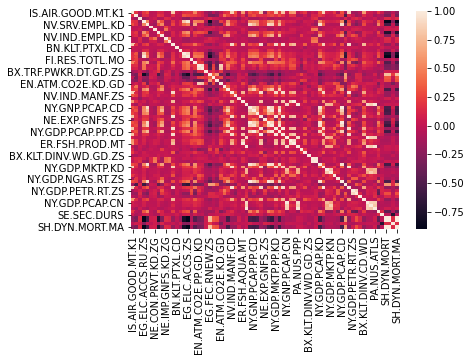

In [360]:
sns.heatmap(X.corr());

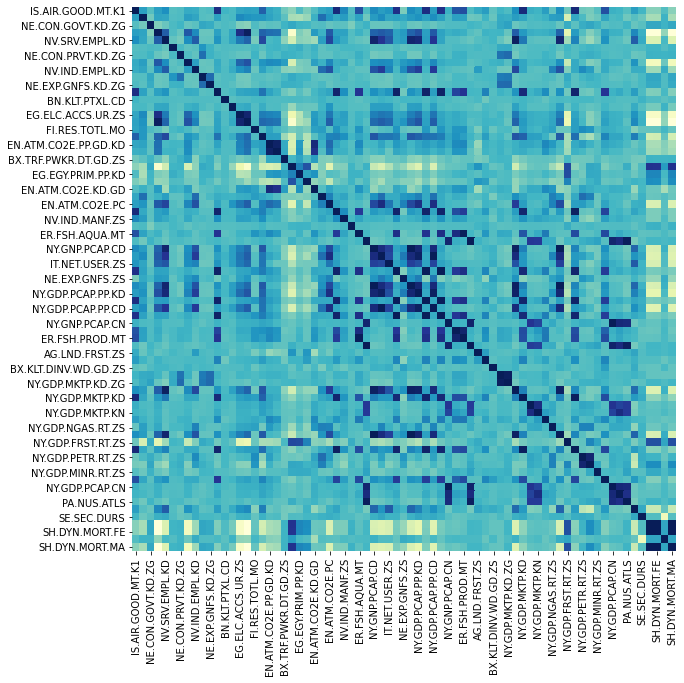

In [102]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(),cmap="YlGnBu",cbar=False,square=True)
#plt.setp(g.set_yticklabels([]))
#plt.setp(g.set_xticklabels([]));
#plt.xticks([])
#plt.yticks([])
plt.savefig('demo.png', transparent=True)

/Users/wangzizheng/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


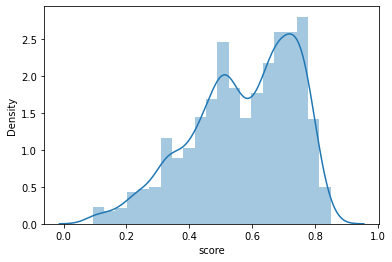

In [372]:
sns.distplot(data_0202['score']);

In [395]:
corr_feature=np.abs(X.corrwith(data_0202['score'])).sort_values(ascending=False)

In [402]:
top20_feature=corr_feature[:20]

In [403]:
top20_feature

NY.GNP.MKTP.PC.CD    0.488103
NY.GNP.PCAP.CD       0.487070
NY.GDP.PCAP.CD       0.482954
NY.GDP.PCAP.KD       0.463195
NY.GNP.PCAP.PP.CD    0.421988
NY.GDP.PCAP.PP.CD    0.415557
NV.SRV.EMPL.KD       0.410682
NY.GDP.PCAP.PP.KD    0.393222
EN.ATM.CO2E.PC       0.379220
SE.PRM.DURS          0.262482
NV.IND.EMPL.KD       0.260460
EG.EGY.PRIM.PP.KD    0.254105
IT.NET.USER.ZS       0.249757
EG.ELC.ACCS.UR.ZS    0.249239
NY.GDP.FRST.RT.ZS    0.240741
EG.ELC.ACCS.ZS       0.240522
EG.FEC.RNEW.ZS       0.235539
EN.ATM.CO2E.KD.GD    0.235109
SH.DYN.MORT.FE       0.233941
SH.DYN.MORT          0.228171
dtype: float64

/Users/wangzizheng/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

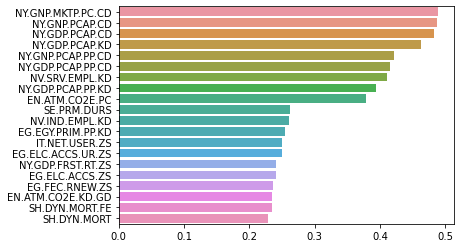

In [408]:
sns.barplot(top20_feature.values,top20_feature.index,orient='h')

In [410]:
top20_feature.index

Index(['NY.GNP.MKTP.PC.CD', 'NY.GNP.PCAP.CD', 'NY.GDP.PCAP.CD',
       'NY.GDP.PCAP.KD', 'NY.GNP.PCAP.PP.CD', 'NY.GDP.PCAP.PP.CD',
       'NV.SRV.EMPL.KD', 'NY.GDP.PCAP.PP.KD', 'EN.ATM.CO2E.PC', 'SE.PRM.DURS',
       'NV.IND.EMPL.KD', 'EG.EGY.PRIM.PP.KD', 'IT.NET.USER.ZS',
       'EG.ELC.ACCS.UR.ZS', 'NY.GDP.FRST.RT.ZS', 'EG.ELC.ACCS.ZS',
       'EG.FEC.RNEW.ZS', 'EN.ATM.CO2E.KD.GD', 'SH.DYN.MORT.FE', 'SH.DYN.MORT'],
      dtype='object')

In [418]:
import_to_tableau=X.corrwith(data_0202['score'])[top20_feature.index]

In [421]:
import_to_tableau.to_csv('top_20_feature.csv')

In [422]:
pd.read_csv('top_20_feature.csv')

,Unnamed: 0,0
0,NY.GNP.MKTP.PC.CD,-0.488103
1,NY.GNP.PCAP.CD,-0.487070
2,NY.GDP.PCAP.CD,-0.482954
3,NY.GDP.PCAP.KD,-0.463195
4,NY.GNP.PCAP.PP.CD,-0.421988
5,NY.GDP.PCAP.PP.CD,-0.415557
6,NV.SRV.EMPL.KD,-0.410682
7,NY.GDP.PCAP.PP.KD,-0.393222
8,EN.ATM.CO2E.PC,-0.379220
9,SE.PRM.DURS,-0.262482


In [429]:
dic=pd.read_excel('./DICTIONARY.xlsx')

In [448]:
indidic=dic[['Indicator Name','Indicator Code']].drop_duplicates()

In [449]:
indi_use=list(X.columns)

In [452]:
indi_to_use=indidic[indidic['Indicator Code'].isin(indi_use)]

In [457]:
indi_to_use.to_csv('indi_to_use.csv',columns=['Indicator Name','Indicator Code'],index=None)

In [462]:
pillars=pd.read_csv('indi_to_use.csv')

In [467]:
feature=pillars['Indicator Code'].values

In [468]:
X_tmp=X[feature]

In [473]:
max(X_tmp.isna().sum(axis=1).values)

13

In [479]:
features=list(X_tmp.columns)

In [481]:
data=data_0202[features]

In [486]:
data_0202[features]

,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,NY.ADJ.SVNX.GN.ZS,NV.AGR.EMPL.KD,IS.AIR.GOOD.MT.K1,IS.AIR.PSGR,ER.FSH.AQUA.MT,ER.FSH.CAPT.MT,AG.YLD.CREL.KG,...,PA.NUS.PPP,PA.NUS.PRVT.PP,SE.PRM.DURS,EG.ELC.RNEW.ZS,EG.FEC.RNEW.ZS,SE.ENR.PRIM.FM.ZS,SE.SEC.DURS,NV.SRV.EMPL.KD,ER.FSH.PROD.MT,NY.GDP.TOTL.RT.ZS
3,NaN,NaN,NaN,5.870945,NaN,213.600006,5369100.0,300.000000,560857.0,2250.8,...,0.293643,NaN,7.0,35.441466,8.922907,0.98350,5.0,NaN,561157.000000,2.587267
6,100.000000,100.000000,99.917152,9.242528,NaN,1222.300049,17553400.0,12401.000000,237505.0,1716.1,...,1.365519,1.386268,6.0,9.656031,8.009577,0.99717,6.0,NaN,249906.000000,3.484549
7,100.000000,100.000000,99.898689,NaN,NaN,53.900002,2532100.0,3126.000000,533.0,5577.3,...,0.922246,0.940839,4.0,66.202126,25.135754,0.99623,8.0,NaN,3659.000000,0.255409
9,NaN,NaN,NaN,-17.242979,NaN,NaN,8300.0,30.000000,17395.0,1348.5,...,71.148254,81.714115,6.0,98.181818,95.200672,0.80117,7.0,NaN,17425.000000,13.371033
10,100.000000,100.000000,99.898689,NaN,NaN,656.400024,3132700.0,675.000000,41460.0,5755.1,...,0.915381,0.975761,6.0,0.789564,1.269461,1.01820,6.0,NaN,42135.000000,0.045597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,47.000000,37.713245,70.700000,9.947512,358.660735,NaN,NaN,2500.459961,52.0,755.8,...,5.743313,5.362195,7.0,NaN,NaN,NaN,5.0,5927.386035,2552.459961,3.275501
2605,100.000000,100.000000,100.000000,11.151911,12261.992755,0.000000,26031.0,3750.090088,74383.0,3181.2,...,0.433085,0.473127,4.0,NaN,NaN,1.00032,8.0,32344.017737,78133.093750,0.365901
2606,100.000000,100.000000,100.000000,5.208358,16351.364972,4.014870,4058762.0,829.659973,135467.0,3026.2,...,0.475959,0.537914,6.0,NaN,NaN,1.00484,6.0,30817.348415,136296.656250,0.980536
2607,100.000000,100.000000,98.956375,3.975769,2718.515369,10.733220,2545105.0,8600.000000,53697.0,2379.7,...,0.460901,0.508201,6.0,NaN,NaN,0.96830,6.0,8507.880128,62297.000000,0.655778


In [483]:
data['year']=data_0202['year']

<ipython-input-483-3e521d364aa2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year']=data_0202['year']


In [484]:
data

,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,NY.ADJ.SVNX.GN.ZS,NV.AGR.EMPL.KD,IS.AIR.GOOD.MT.K1,IS.AIR.PSGR,ER.FSH.AQUA.MT,ER.FSH.CAPT.MT,AG.YLD.CREL.KG,...,PA.NUS.PRVT.PP,SE.PRM.DURS,EG.ELC.RNEW.ZS,EG.FEC.RNEW.ZS,SE.ENR.PRIM.FM.ZS,SE.SEC.DURS,NV.SRV.EMPL.KD,ER.FSH.PROD.MT,NY.GDP.TOTL.RT.ZS,year
3,NaN,NaN,NaN,5.870945,NaN,213.600006,5369100.0,300.000000,560857.0,2250.8,...,NaN,7.0,35.441466,8.922907,0.98350,5.0,NaN,561157.000000,2.587267,1990
6,100.000000,100.000000,99.917152,9.242528,NaN,1222.300049,17553400.0,12401.000000,237505.0,1716.1,...,1.386268,6.0,9.656031,8.009577,0.99717,6.0,NaN,249906.000000,3.484549,1990
7,100.000000,100.000000,99.898689,NaN,NaN,53.900002,2532100.0,3126.000000,533.0,5577.3,...,0.940839,4.0,66.202126,25.135754,0.99623,8.0,NaN,3659.000000,0.255409,1990
9,NaN,NaN,NaN,-17.242979,NaN,NaN,8300.0,30.000000,17395.0,1348.5,...,81.714115,6.0,98.181818,95.200672,0.80117,7.0,NaN,17425.000000,13.371033,1990
10,100.000000,100.000000,99.898689,NaN,NaN,656.400024,3132700.0,675.000000,41460.0,5755.1,...,0.975761,6.0,0.789564,1.269461,1.01820,6.0,NaN,42135.000000,0.045597,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,47.000000,37.713245,70.700000,9.947512,358.660735,NaN,NaN,2500.459961,52.0,755.8,...,5.362195,7.0,NaN,NaN,NaN,5.0,5927.386035,2552.459961,3.275501,2018
2605,100.000000,100.000000,100.000000,11.151911,12261.992755,0.000000,26031.0,3750.090088,74383.0,3181.2,...,0.473127,4.0,NaN,NaN,1.00032,8.0,32344.017737,78133.093750,0.365901,2018
2606,100.000000,100.000000,100.000000,5.208358,16351.364972,4.014870,4058762.0,829.659973,135467.0,3026.2,...,0.537914,6.0,NaN,NaN,1.00484,6.0,30817.348415,136296.656250,0.980536,2018
2607,100.000000,100.000000,98.956375,3.975769,2718.515369,10.733220,2545105.0,8600.000000,53697.0,2379.7,...,0.508201,6.0,NaN,NaN,0.96830,6.0,8507.880128,62297.000000,0.655778,2018


In [487]:
data_0202

,IS.AIR.GOOD.MT.K1,NY.ADJ.SVNX.GN.ZS,NE.CON.GOVT.KD.ZG,EG.ELC.ACCS.RU.ZS,NV.SRV.EMPL.KD,NE.GDI.TOTL.KD.ZG,NE.CON.PRVT.KD.ZG,SE.ENR.PRIM.FM.ZS,NV.IND.EMPL.KD,NE.IMP.GNFS.KD.ZG,...,PA.NUS.ATLS,SG.LAW.INDX,SE.SEC.DURS,SH.DYN.MORT,SH.DYN.MORT.FE,SE.PRM.DURS,SH.DYN.MORT.MA,country,year,score
3,213.600006,5.870945,NaN,NaN,NaN,-16.850089,NaN,0.98350,NaN,-1.899917,...,0.487590,59.375,5.0,28.6,25.6,7.0,31.6,ARG,1990,0.771
6,1222.300049,9.242528,2.649488,100.000000,NaN,2.999076,4.307873,0.99717,NaN,5.617548,...,1.299500,75.000,6.0,9.2,8.1,6.0,10.3,AUS,1990,0.336
7,53.900002,NaN,2.110688,100.000000,NaN,5.632026,4.234836,0.99623,NaN,7.980330,...,0.826300,70.625,8.0,9.5,8.4,4.0,10.6,AUT,1990,0.680
9,NaN,-17.242979,NaN,NaN,NaN,NaN,NaN,0.80117,NaN,NaN,...,171.255000,47.500,7.0,174.3,166.1,6.0,182.1,BDI,1990,0.322
10,656.400024,NaN,-0.386704,100.000000,NaN,7.670910,3.174529,1.01820,NaN,4.868733,...,0.828400,61.250,6.0,10.0,8.6,6.0,11.3,BEL,1990,0.745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,NaN,9.947512,0.744562,37.713245,5927.386035,8.719441,-8.393098,NaN,7261.024644,0.697151,...,13.233900,78.125,5.0,86.6,79.0,7.0,93.9,LSO,2018,0.550
2605,0.000000,11.151911,0.205319,100.000000,32344.017737,4.680861,3.692303,1.00032,38059.369309,6.008147,...,0.846773,93.750,8.0,4.0,3.7,4.0,4.4,LTU,2018,0.290
2606,4.014870,5.208358,1.583546,100.000000,30817.348415,15.763125,2.645233,1.00484,27990.621541,6.440314,...,0.846773,100.000,6.0,3.9,3.5,6.0,4.2,LVA,2018,0.535
2607,10.733220,3.975769,0.165093,100.000000,8507.880128,6.712370,3.105484,0.96830,9557.650309,5.462899,...,1.000000,88.750,6.0,13.7,12.3,6.0,15.1,SLV,2018,0.721


In [488]:
data['country']=data_0202['country']

<ipython-input-488-ddc3e1af59eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['country']=data_0202['country']


In [489]:
data['score']=data_0202['score']

<ipython-input-489-fafa1b023db2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['score']=data_0202['score']


In [490]:
data

,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,NY.ADJ.SVNX.GN.ZS,NV.AGR.EMPL.KD,IS.AIR.GOOD.MT.K1,IS.AIR.PSGR,ER.FSH.AQUA.MT,ER.FSH.CAPT.MT,AG.YLD.CREL.KG,...,EG.ELC.RNEW.ZS,EG.FEC.RNEW.ZS,SE.ENR.PRIM.FM.ZS,SE.SEC.DURS,NV.SRV.EMPL.KD,ER.FSH.PROD.MT,NY.GDP.TOTL.RT.ZS,year,country,score
3,NaN,NaN,NaN,5.870945,NaN,213.600006,5369100.0,300.000000,560857.0,2250.8,...,35.441466,8.922907,0.98350,5.0,NaN,561157.000000,2.587267,1990,ARG,0.771
6,100.000000,100.000000,99.917152,9.242528,NaN,1222.300049,17553400.0,12401.000000,237505.0,1716.1,...,9.656031,8.009577,0.99717,6.0,NaN,249906.000000,3.484549,1990,AUS,0.336
7,100.000000,100.000000,99.898689,NaN,NaN,53.900002,2532100.0,3126.000000,533.0,5577.3,...,66.202126,25.135754,0.99623,8.0,NaN,3659.000000,0.255409,1990,AUT,0.680
9,NaN,NaN,NaN,-17.242979,NaN,NaN,8300.0,30.000000,17395.0,1348.5,...,98.181818,95.200672,0.80117,7.0,NaN,17425.000000,13.371033,1990,BDI,0.322
10,100.000000,100.000000,99.898689,NaN,NaN,656.400024,3132700.0,675.000000,41460.0,5755.1,...,0.789564,1.269461,1.01820,6.0,NaN,42135.000000,0.045597,1990,BEL,0.745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,47.000000,37.713245,70.700000,9.947512,358.660735,NaN,NaN,2500.459961,52.0,755.8,...,NaN,NaN,NaN,5.0,5927.386035,2552.459961,3.275501,2018,LSO,0.550
2605,100.000000,100.000000,100.000000,11.151911,12261.992755,0.000000,26031.0,3750.090088,74383.0,3181.2,...,NaN,NaN,1.00032,8.0,32344.017737,78133.093750,0.365901,2018,LTU,0.290
2606,100.000000,100.000000,100.000000,5.208358,16351.364972,4.014870,4058762.0,829.659973,135467.0,3026.2,...,NaN,NaN,1.00484,6.0,30817.348415,136296.656250,0.980536,2018,LVA,0.535
2607,100.000000,100.000000,98.956375,3.975769,2718.515369,10.733220,2545105.0,8600.000000,53697.0,2379.7,...,NaN,NaN,0.96830,6.0,8507.880128,62297.000000,0.655778,2018,SLV,0.721


In [493]:
data.to_csv('prepared_data.csv',index=None)

In [494]:
pd.read_csv('prepared_data.csv')

,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,NY.ADJ.SVNX.GN.ZS,NV.AGR.EMPL.KD,IS.AIR.GOOD.MT.K1,IS.AIR.PSGR,ER.FSH.AQUA.MT,ER.FSH.CAPT.MT,AG.YLD.CREL.KG,...,EG.ELC.RNEW.ZS,EG.FEC.RNEW.ZS,SE.ENR.PRIM.FM.ZS,SE.SEC.DURS,NV.SRV.EMPL.KD,ER.FSH.PROD.MT,NY.GDP.TOTL.RT.ZS,year,country,score
0,NaN,NaN,NaN,5.870945,NaN,213.600006,5369100.0,300.000000,560857.0,2250.8,...,35.441466,8.922907,0.98350,5.0,NaN,561157.000000,2.587267,1990,ARG,0.771
1,100.000000,100.000000,99.917152,9.242528,NaN,1222.300049,17553400.0,12401.000000,237505.0,1716.1,...,9.656031,8.009577,0.99717,6.0,NaN,249906.000000,3.484549,1990,AUS,0.336
2,100.000000,100.000000,99.898689,NaN,NaN,53.900002,2532100.0,3126.000000,533.0,5577.3,...,66.202126,25.135754,0.99623,8.0,NaN,3659.000000,0.255409,1990,AUT,0.680
3,NaN,NaN,NaN,-17.242979,NaN,NaN,8300.0,30.000000,17395.0,1348.5,...,98.181818,95.200672,0.80117,7.0,NaN,17425.000000,13.371033,1990,BDI,0.322
4,100.000000,100.000000,99.898689,NaN,NaN,656.400024,3132700.0,675.000000,41460.0,5755.1,...,0.789564,1.269461,1.01820,6.0,NaN,42135.000000,0.045597,1990,BEL,0.745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,47.000000,37.713245,70.700000,9.947512,358.660735,NaN,NaN,2500.459961,52.0,755.8,...,NaN,NaN,NaN,5.0,5927.386035,2552.459961,3.275501,2018,LSO,0.550
2254,100.000000,100.000000,100.000000,11.151911,12261.992755,0.000000,26031.0,3750.090088,74383.0,3181.2,...,NaN,NaN,1.00032,8.0,32344.017737,78133.093750,0.365901,2018,LTU,0.290
2255,100.000000,100.000000,100.000000,5.208358,16351.364972,4.014870,4058762.0,829.659973,135467.0,3026.2,...,NaN,NaN,1.00484,6.0,30817.348415,136296.656250,0.980536,2018,LVA,0.535
2256,100.000000,100.000000,98.956375,3.975769,2718.515369,10.733220,2545105.0,8600.000000,53697.0,2379.7,...,NaN,NaN,0.96830,6.0,8507.880128,62297.000000,0.655778,2018,SLV,0.721
